In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Create A Path to the CSV file
crime_rates = Path("./crime_250_plus.csv")
cities_population = Path("./updated_cities.csv")

# Read School and Student Data File and store into Pandas DataFrames
cities_crime_rates_df = pd.read_csv(crime_rates)
population_city_df = pd.read_csv(cities_population)

# Combine both CSV files into dataset
crime_rates_plus_population_df = pd.merge(cities_crime_rates_df, population_city_df, left_on= "cities", right_on= "US City", how= "right")
crime_rates_plus_population_df.head()


,states,cities,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,...,tot_prop_crim,arson,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,New York,New York,"8,804,190",1987.49,3.39,27.56,162.42,345.52,538.90,128.87,...,"1,448.59",NaN,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,California,Los Angeles,"3,898,747",3332.52,7.01,61.27,269.87,423.17,761.31,415.96,...,"2,535.92",35.29,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,Illinois,Chicago,"2,746,388",4381.65,18.26,65.11,439.26,570.36,"1,098.86",477.13,...,"3,263.80",18.99,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,Texas,Houston,"2,304,580",5252.08,11.50,58.42,417.96,607.34,"1,095.23",731.66,...,"4,128.41",28.44,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,Arizona,Phoenix,"1,608,139",4443.20,9.55,69.46,200.28,481.64,760.93,778.57,...,"3,670.71",11.56,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33


In [3]:
crime_rates_plus_population_df = crime_rates_plus_population_df.set_index("cities")
crime_rates_plus_population_df.head()

,states,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,...,tot_prop_crim,arson,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
cities,,,,,,,,,,,,,,,,,,,,,
New York,New York,"8,804,190",1987.49,3.39,27.56,162.42,345.52,538.90,128.87,"1,253.15",...,"1,448.59",NaN,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
Los Angeles,California,"3,898,747",3332.52,7.01,61.27,269.87,423.17,761.31,415.96,"1,640.99",...,"2,535.92",35.29,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
Chicago,Illinois,"2,746,388",4381.65,18.26,65.11,439.26,570.36,"1,098.86",477.13,"2,358.83",...,"3,263.80",18.99,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
Houston,Texas,"2,304,580",5252.08,11.50,58.42,417.96,607.34,"1,095.23",731.66,"2,900.82",...,"4,128.41",28.44,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
Phoenix,Arizona,"1,608,139",4443.20,9.55,69.46,200.28,481.64,760.93,778.57,"2,426.69",...,"3,670.71",11.56,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33


In [4]:
# filter cities to the 10 chosen for the project
cities= ["Atlanta", "Austin", "Chicago", "Denver", "Los Angeles", "Nashville (balance)", "New York", "San Diego", "Boston", "Tampa"]

cities = [city.replace(" (balance)", "") for city in cities]

# Filter the Data Frame
cities_filtered_df= crime_rates_plus_population_df[crime_rates_plus_population_df['US City'].isin(cities)]
cities_filtered_df

,states,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,...,tot_prop_crim,arson,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
cities,,,,,,,,,,,,,,,,,,,,,
New York,New York,"8,804,190",1987.49,3.39,27.56,162.42,345.52,538.90,128.87,"1,253.15",...,"1,448.59",NaN,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
Los Angeles,California,"3,898,747",3332.52,7.01,61.27,269.87,423.17,761.31,415.96,"1,640.99",...,"2,535.92",35.29,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
Chicago,Illinois,"2,746,388",4381.65,18.26,65.11,439.26,570.36,"1,098.86",477.13,"2,358.83",...,"3,263.80",18.99,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
San Diego,California,"1,386,932",2220.67,2.46,39.25,99.01,225.89,366.61,268.03,"1,214.37",...,"1,842.97",11.09,8,San Diego,California,1388996,1386292,0.0005,4260,326.09
Austin,Texas,"971,949",3612.23,2.57,85.81,101.55,224.91,414.84,450.64,"2,525.03",...,"3,189.57",7.82,12,Austin,Texas,984567,965827,0.0048,3017,326.37
Denver,Colorado,"706,616",4360.93,8.35,98.92,174.35,393.99,675.61,612.92,"2,267.29",...,"3,667.06",18.26,19,Denver,Colorado,716234,717606,-0.0005,4679,153.07
Nashville,Tennessee,"674,942",4966.50,16.30,72.90,303.14,745.84,"1,138.17",631.31,"2,806.61",...,"3,817.96",10.37,21,Nashville,Tennessee,687150,689700,-0.0009,1445,475.57
Boston,Massachusetts,"682,903",2758.22,8.35,42.47,205.59,412.80,669.20,308.83,"1,603.74",...,"2,089.02",NaN,25,Boston,Massachusetts,646622,675466,-0.0110,13377,48.34
Atlanta,Georgia,"481,343",5727.52,16.41,58.59,293.55,567.16,935.72,704.28,"3,387.19",...,"4,776.43",15.37,36,Atlanta,Georgia,514465,499896,0.0071,3804,135.25


In [5]:
# New Data Frame with only certain columns (states, cities, total_crime)
cities_crime_rates_clean = cities_filtered_df[["states", "Population 2024", "total_crime"]]
cities_crime_rates_clean

,states,Population 2024,total_crime
cities,,,
New York,New York,8097282,1987.49
Los Angeles,California,3795936,3332.52
Chicago,Illinois,2638159,4381.65
San Diego,California,1388996,2220.67
Austin,Texas,984567,3612.23
Denver,Colorado,716234,4360.93
Nashville,Tennessee,687150,4966.50
Boston,Massachusetts,646622,2758.22
Atlanta,Georgia,514465,5727.52


In [6]:
total_crime_df= cities_crime_rates_clean["total_crime"]
total_crime_df

cities
New York       1987.49
Los Angeles    3332.52
Chicago        4381.65
San Diego      2220.67
Austin         3612.23
Denver         4360.93
Nashville      4966.50
Boston         2758.22
Atlanta        5727.52
Tampa          2218.24
Name: total_crime, dtype: float64

In [7]:
cities_crime_rates_clean['total crime score'] = cities_crime_rates_clean['total_crime'].rank()
cities_crime_rates_clean

,states,Population 2024,total_crime,total crime score
cities,,,,
New York,New York,8097282,1987.49,1.0
Los Angeles,California,3795936,3332.52,5.0
Chicago,Illinois,2638159,4381.65,8.0
San Diego,California,1388996,2220.67,3.0
Austin,Texas,984567,3612.23,6.0
Denver,Colorado,716234,4360.93,7.0
Nashville,Tennessee,687150,4966.50,9.0
Boston,Massachusetts,646622,2758.22,4.0
Atlanta,Georgia,514465,5727.52,10.0


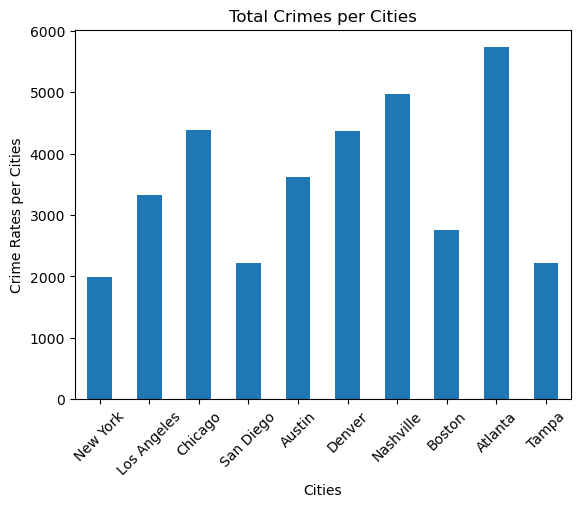

In [8]:
# Create a bar graph for the assigned cities crime
cities_crime_rates_graph= total_crime_df.plot(kind="bar")
cities_crime_rates_graph.set_xlabel("Cities")
cities_crime_rates_graph.set_ylabel("Crime Rates per Cities")
cities_crime_rates_graph.set_title("Total Crimes per Cities")
plt.xticks(rotation = 45)
plt.show()

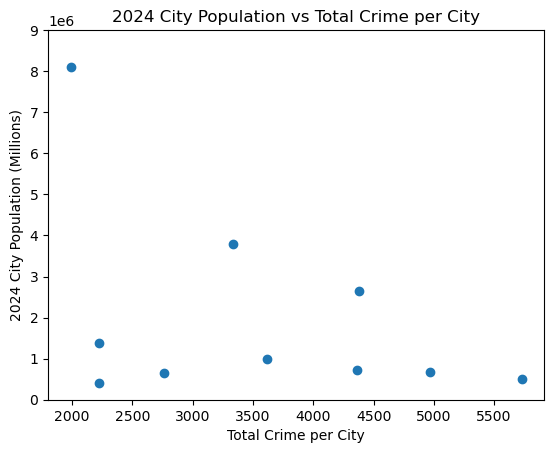

In [9]:
# label x and y values
x_values = cities_crime_rates_clean['Population 2024']
y_values = cities_crime_rates_clean['total_crime']

# Create a scatter plot for Total Crimes per Cities
plt.xlabel("Total Crime per City")
plt.ylabel("2024 City Population (Millions)")
plt.title("2024 City Population vs Total Crime per City")
plt.ylim(0,9000000)
plt.scatter(y_values,x_values)

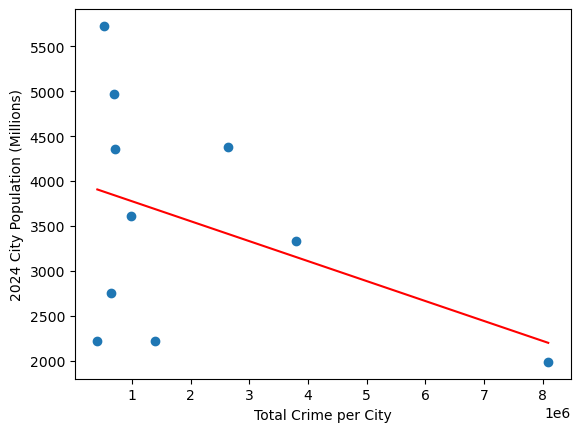

In [10]:
# Create a line regression graph
x_values = cities_crime_rates_clean['Population 2024']
y_values = cities_crime_rates_clean['total_crime']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Total Crime per City')
plt.ylabel('2024 City Population (Millions)')
plt.show()